In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/doctermm/dtm2.pkl
/kaggle/input/preprocc-data/preprocessed_data.pkl
/kaggle/input/docterm/dtm.pkl
/kaggle/input/uci-drug/UCIdrug_train.csv
/kaggle/input/uci-drug/UCIdrug_test.csv


Name: Kanishka
Rollno: 102103772
Batch: 3CO27

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

Reading dataframe from dtm.pkl

In [3]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('/kaggle/input/doctermm/dtm2.pkl')
data = data.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,213859,213860,213861,213862,213863,213864,213865,213866,213867,213868
ago,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
anxiety,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
bad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
better,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,0,0
control,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

# Most common words

Top 20 words

In [4]:
# Sum the values of each row (word) across all columns (documents)
word_counts = data.sum(axis=1)

# Sort the words by their counts in descending order to find the most common ones
most_common_words = word_counts.sort_values(ascending=False)

# Display the top 20 most common words
print(most_common_words.head(20))


day           76947
im            74032
taking        67865
ive           62108
years         62071
pain          60323
effects       60041
months        56727
started       56204
like          55914
days          53685
just          53328
time          51549
feel          47254
pill          40936
weeks         39545
week          38005
took          37297
period        36920
medication    36809
dtype: int64


Most common words

In [5]:
# Sum the values of each row (word) across all columns (documents)
word_counts = data.sum(axis=1)

# Sort the words by their counts in descending order to find the most common ones
most_common_words = word_counts.sort_values(ascending=False)

# Display the top 20 most common words
print(most_common_words)


day           76947
im            74032
taking        67865
ive           62108
years         62071
pain          60323
effects       60041
months        56727
started       56204
like          55914
days          53685
just          53328
time          51549
feel          47254
pill          40936
weeks         39545
week          38005
took          37297
period        36920
medication    36809
doctor        36519
weight        36451
got           35990
did           35839
month         35077
life          33771
dont          33592
bad           32549
anxiety       32091
really        31566
better        29193
went          29042
medicine      28698
work          28624
felt          27490
control       26952
didnt         26512
good          26394
year          25826
great         25578
having        24699
ago           23636
dtype: int64


# **Wordcloud**

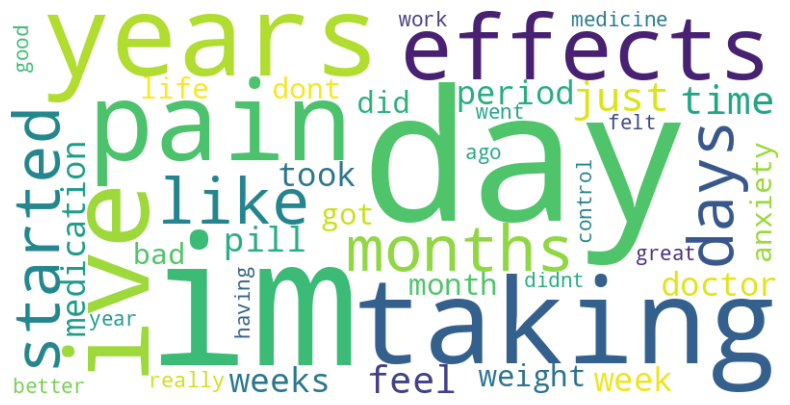

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert most_common_words Series to dictionary
word_freq_dict = most_common_words.to_dict()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# **Word frequency**

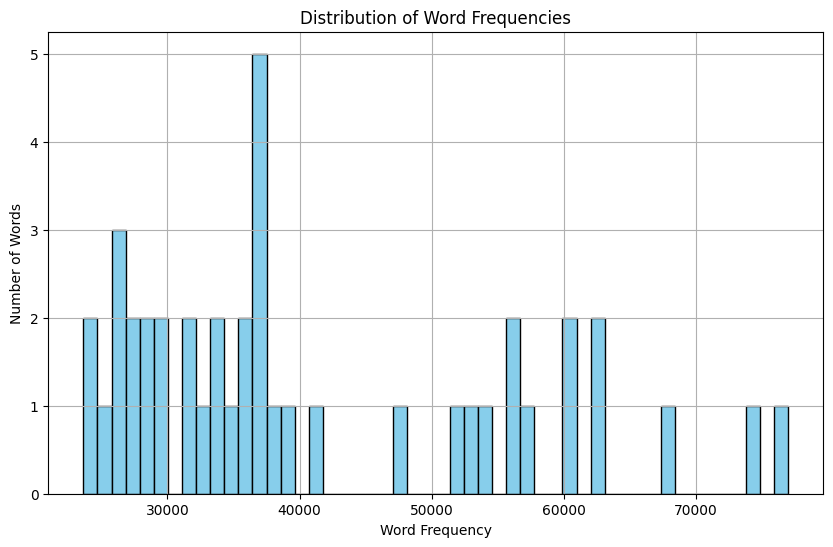

In [7]:
import matplotlib.pyplot as plt

# Calculate the sum of word frequencies across all documents
word_frequencies = data.sum(axis=1)

# Plot a histogram of word frequencies
plt.figure(figsize=(10, 6))
plt.hist(word_frequencies, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.title('Distribution of Word Frequencies')
plt.grid(True)
plt.show()


No. of unique words

In [8]:
# Calculate the number of unique words (rows) in the document-term matrix
num_unique_words = len(data)

print("Number of unique words:", num_unique_words)


Number of unique words: 42


# Word Length Distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


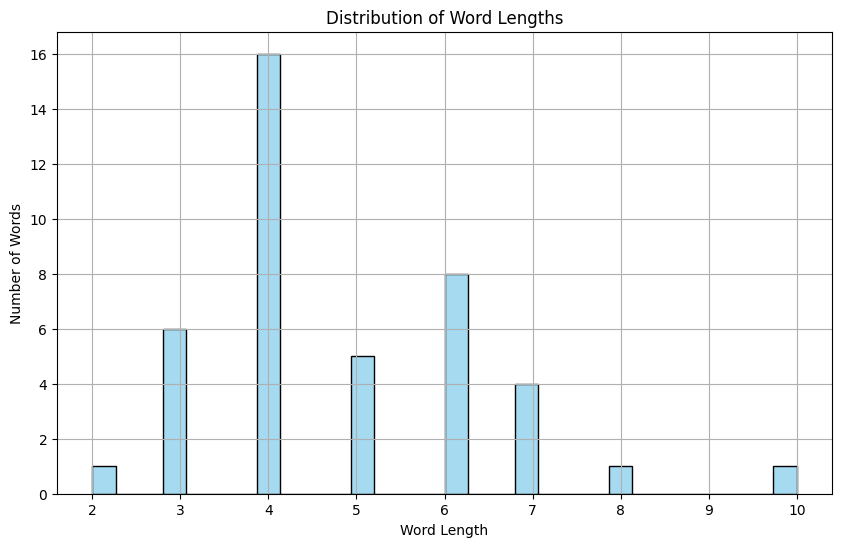

In [9]:
# 3. Word Length Distribution
word_lengths = data.index.str.len()
plt.figure(figsize=(10, 6))
sns.histplot(word_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Number of Words')
plt.title('Distribution of Word Lengths')
plt.grid(True)
plt.show()

In [10]:
# 4. Stopword Removal (Example)
stopwords = set(['the', 'and', 'is', 'are', 'in', 'to', 'of'])  # Define your list of stopwords
data = data.drop(stopwords, errors='ignore')

# Frequency of each unique word

In [11]:
# Calculate the frequency of each unique word
word_frequencies = data.sum(axis=1)

print("Word Frequencies:")
print(word_frequencies)

Word Frequencies:
ago           23636
anxiety       32091
bad           32549
better        29193
control       26952
day           76947
days          53685
did           35839
didnt         26512
doctor        36519
dont          33592
effects       60041
feel          47254
felt          27490
good          26394
got           35990
great         25578
having        24699
im            74032
ive           62108
just          53328
life          33771
like          55914
medication    36809
medicine      28698
month         35077
months        56727
pain          60323
period        36920
pill          40936
really        31566
started       56204
taking        67865
time          51549
took          37297
week          38005
weeks         39545
weight        36451
went          29042
work          28624
year          25826
years         62071
dtype: int64


# **Plot unique word frequency**

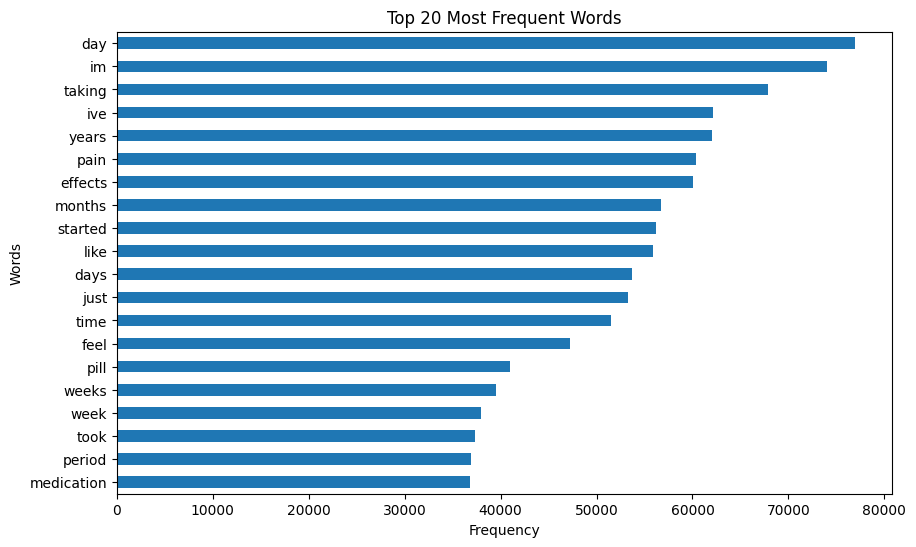

In [12]:



# Calculate the frequency of each unique word
word_frequencies = data.sum(axis=1)

# Sort the word frequencies in descending order
sorted_word_frequencies = word_frequencies.sort_values(ascending=False)

# Plot the top 20 most frequent words
plt.figure(figsize=(10, 6))
sorted_word_frequencies.head(20).plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Frequent Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency words at the top
plt.show()


**Wordcloud**

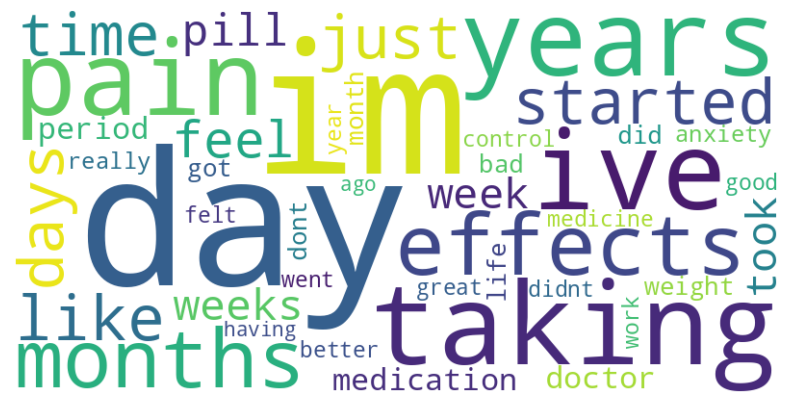

In [13]:


# Calculate the frequency of each unique word
word_frequencies = data.sum(axis=1)

# Convert the word frequencies to a dictionary
word_freq_dict = word_frequencies.to_dict()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Size of vocab**

In [14]:
import pandas as pd

# Load the document-term matrix


# Get the number of unique words (size of vocabulary)
vocab_size = len(data.columns)

print("Size of vocabulary:", vocab_size)


Size of vocabulary: 213869


wordcloud

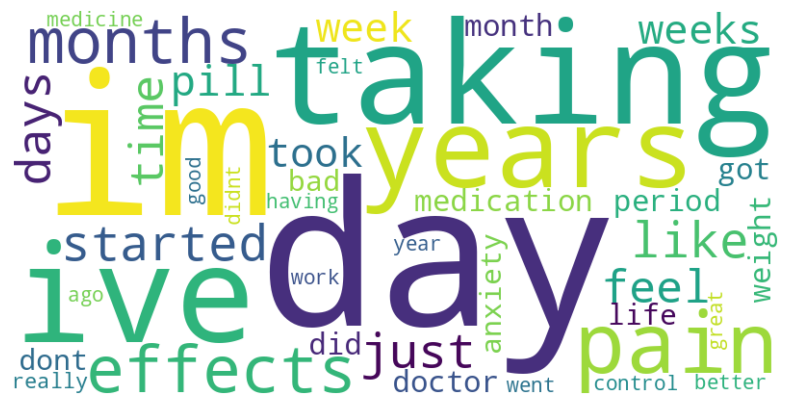

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Load the document-term matrix
# Sum up the frequencies of each word across all documents
word_frequencies = data.sum(axis=1)

# Convert the word frequencies into a dictionary
word_freq_dict = word_frequencies.to_dict()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


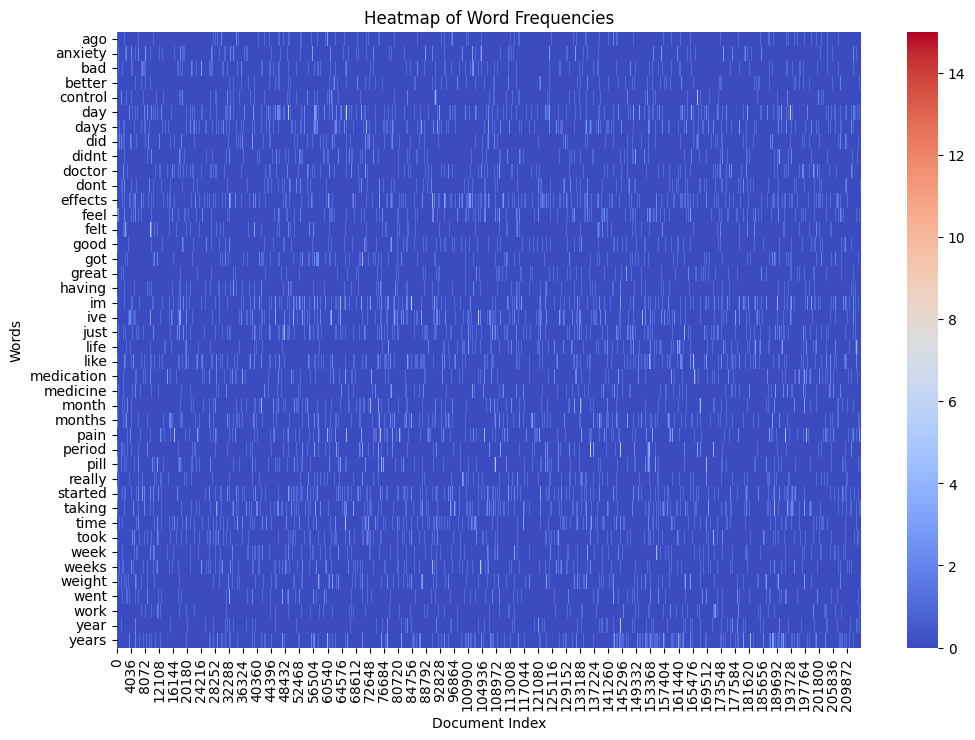

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the document-term matrix
# Assuming 'data' is your document-term matrix DataFrame

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data, cmap='coolwarm')
plt.title('Heatmap of Word Frequencies')
plt.xlabel('Document Index')
plt.ylabel('Words')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1000x800 with 0 Axes>

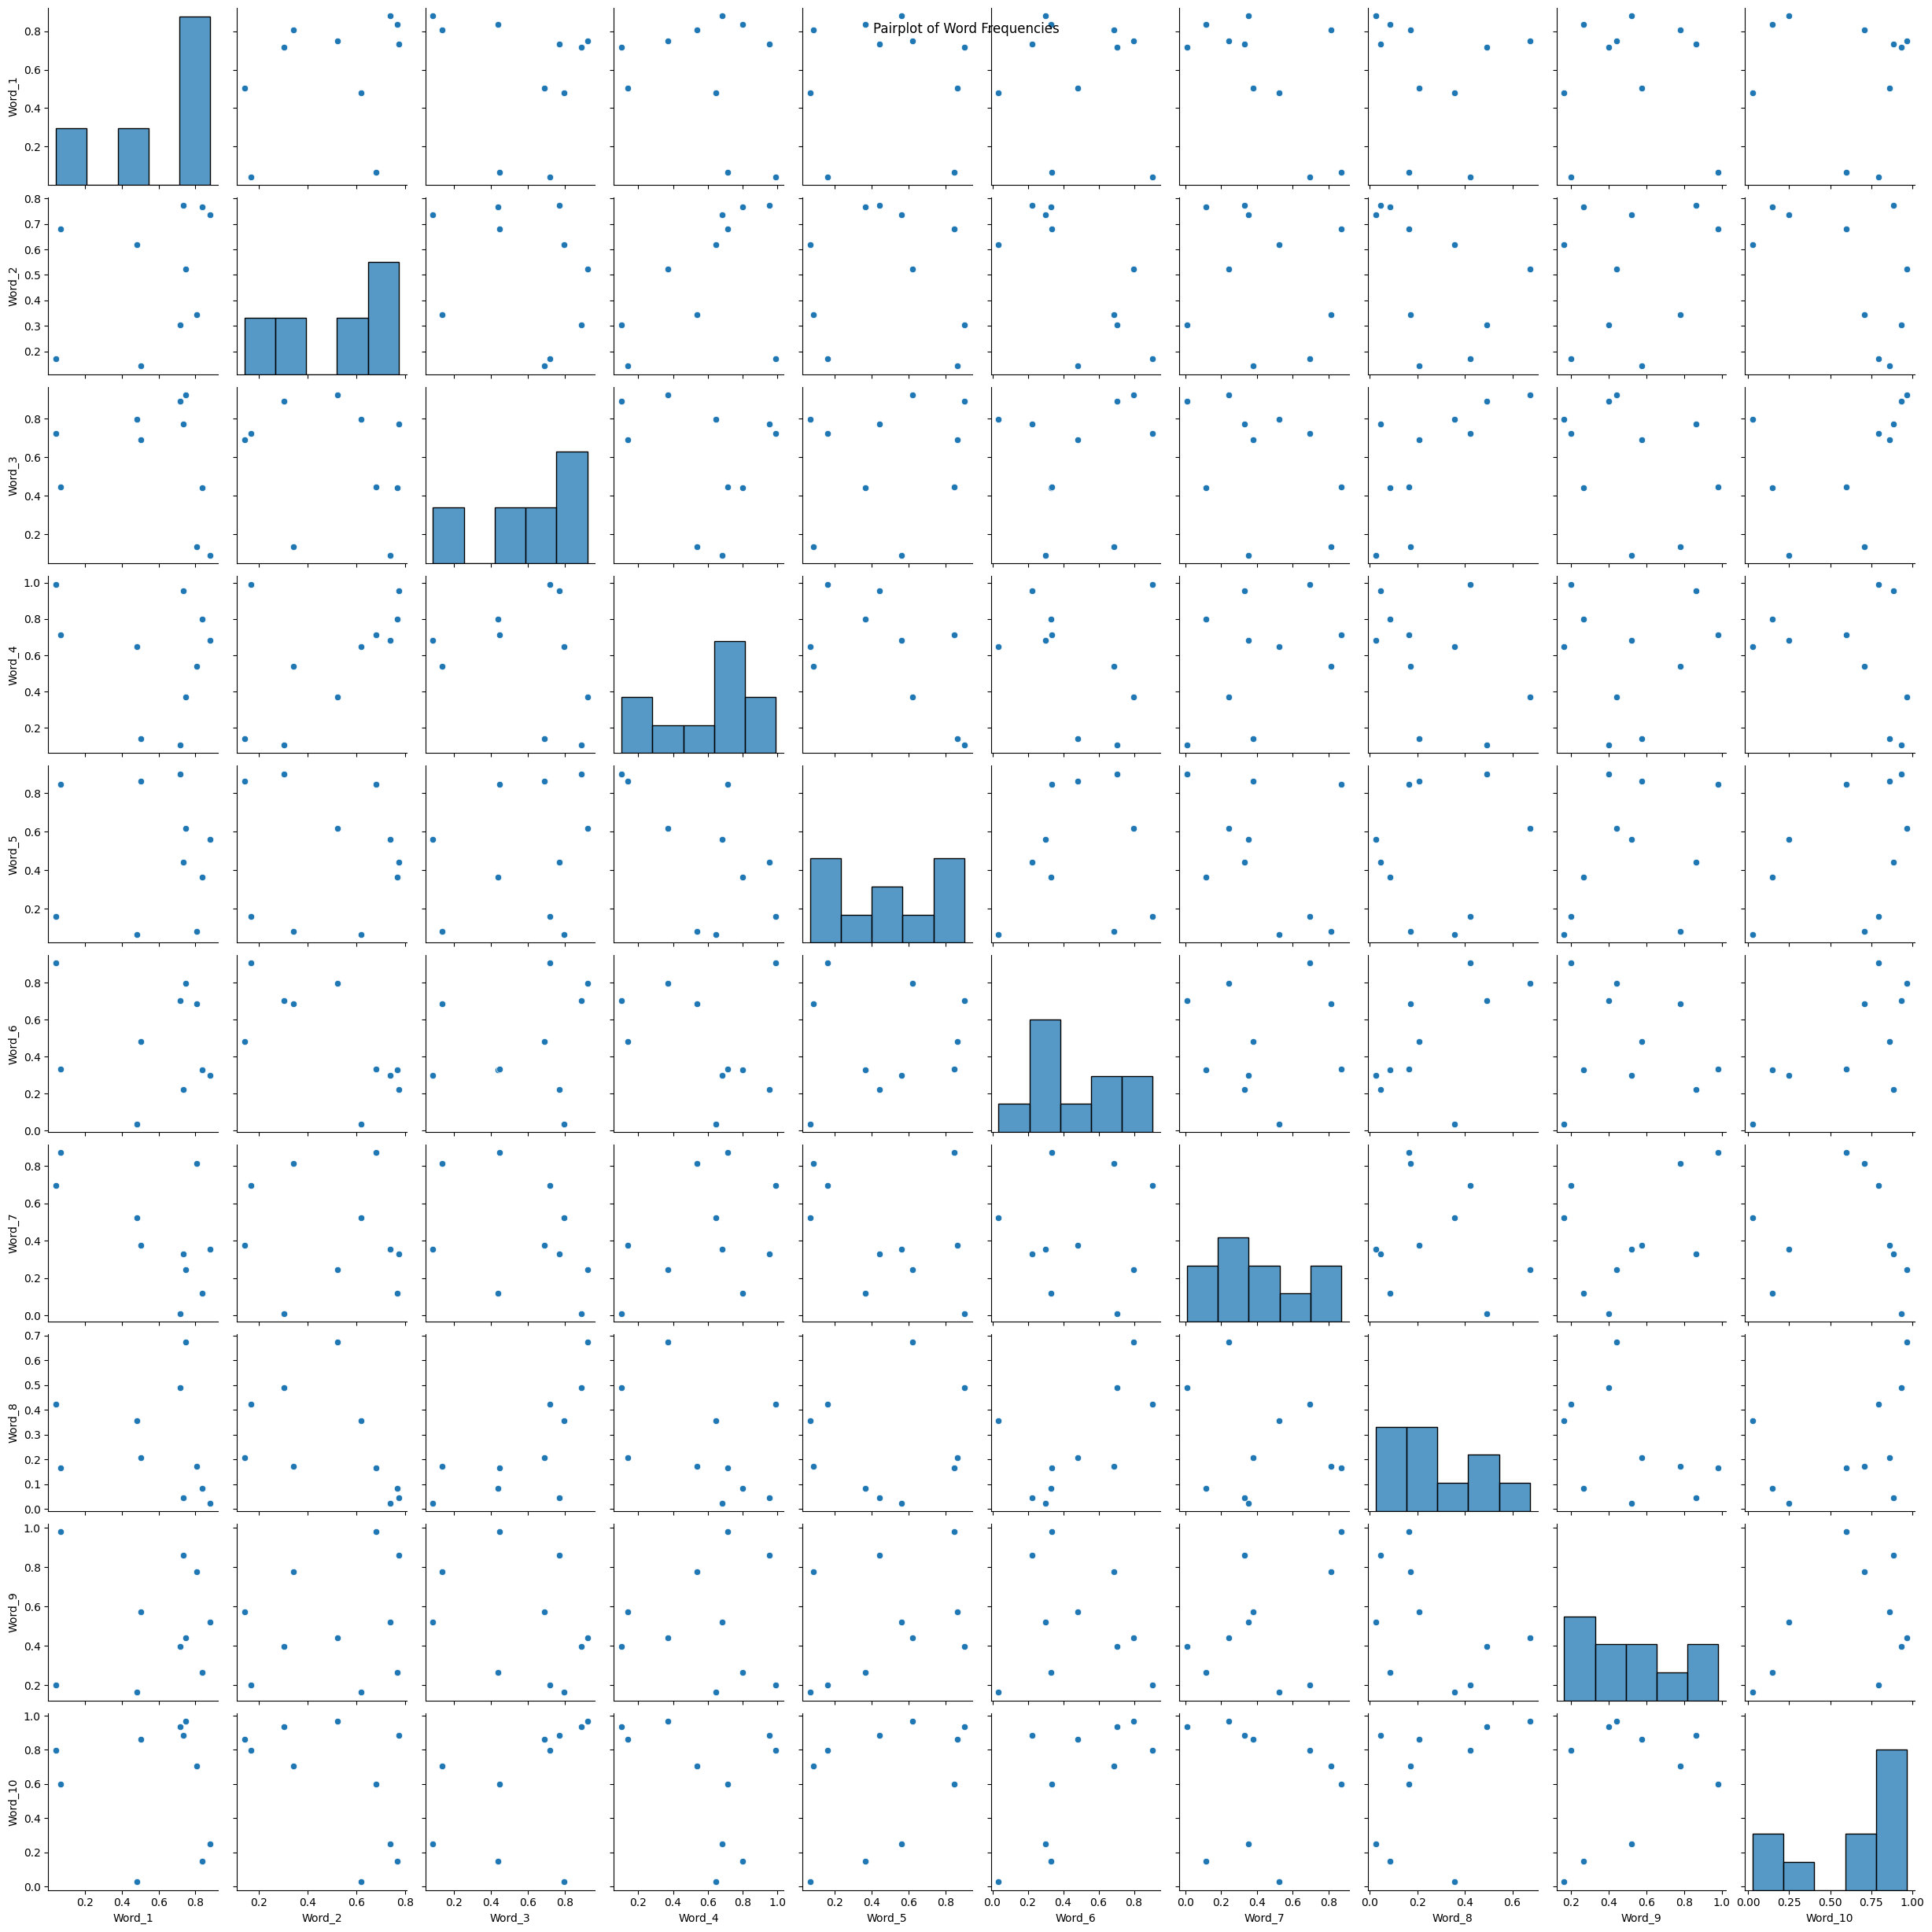

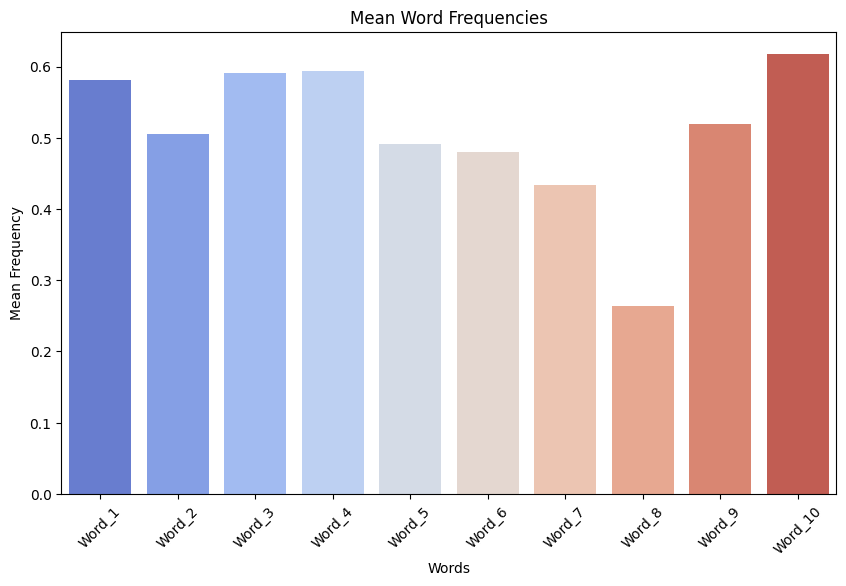

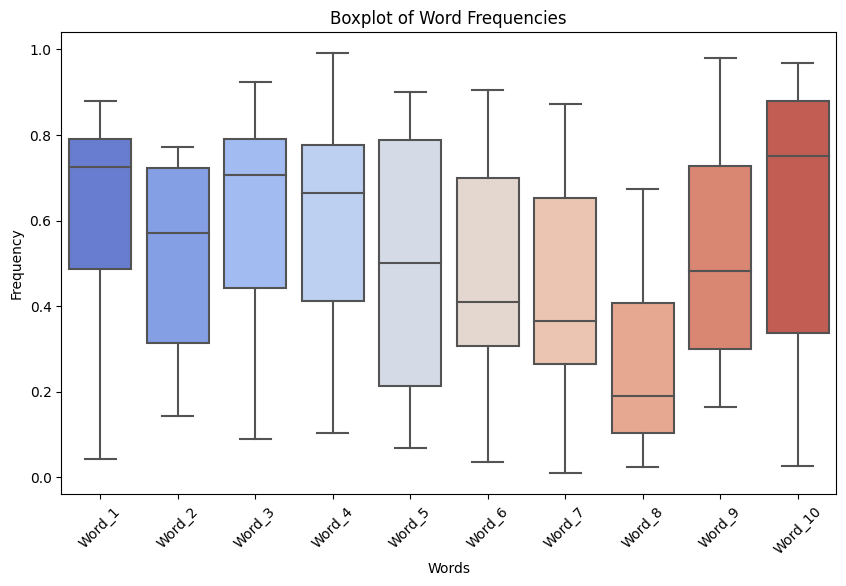

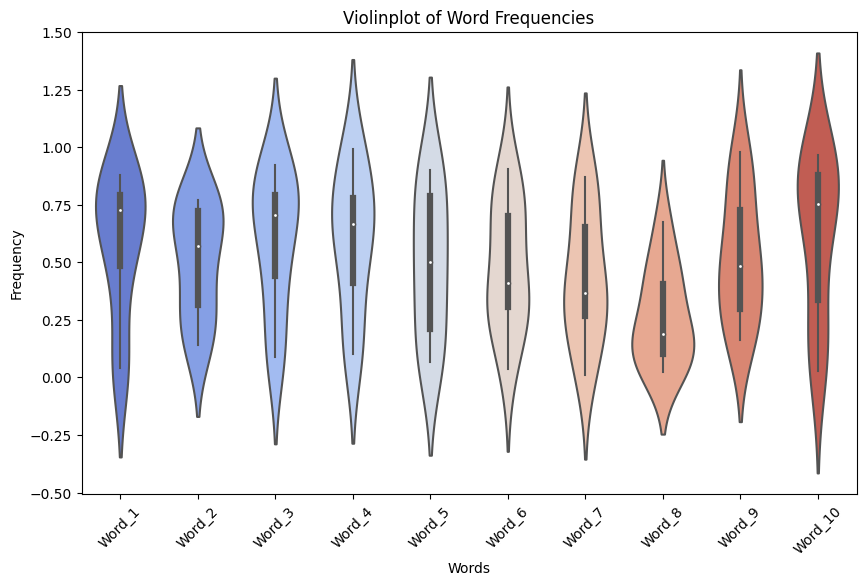

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example data (replace this with your actual data)
data = np.random.rand(10, 10)  # Example document-term matrix
data_df = pd.DataFrame(data, columns=[f"Word_{i}" for i in range(1, 11)])

# Pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(data_df)
plt.suptitle("Pairplot of Word Frequencies")
plt.show()

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=data_df.columns, y=data_df.mean(), palette="coolwarm")
plt.title("Mean Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Mean Frequency")
plt.xticks(rotation=45)
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_df, palette="coolwarm")
plt.title("Boxplot of Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_df, palette="coolwarm")
plt.title("Violinplot of Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [16]:
import pandas as pd

In [18]:
# # Let's update our document-term matrix with the new list of stop words
# from sklearn.feature_extraction import text
# from sklearn.feature_extraction.text import CountVectorizer

# # Read in cleaned data
# data_clean = pd.read_pickle('/kaggle/input/preprocc-data/preprocessed_data.pkl')

# # Add new stop words
# stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# # Recreate document-term matrix
# cv = CountVectorizer(stop_words=stop_words)
# data_cv = cv.fit_transform(data_clean.transcript)
# data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
# data_stop.index = data_clean.index

# # Pickle it for later use
# import pickle
# pickle.dump(cv, open("cv_stop.pkl", "wb"))
# data_stop.to_pickle("dtm_stop.pkl")

In [19]:



# You can add more words to these lists based on your specific requirements

# Example usage
print("Good words:", good_words)
print("Bad words:", bad_words)


Good words: ['good', 'excellent', 'great', 'awesome', 'fantastic', 'superb', 'wonderful', 'amazing']
Bad words: ['bad', 'poor', 'terrible', 'horrible', 'awful', 'dreadful', 'negative', 'unpleasant']


In [24]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,213859,213860,213861,213862,213863,213864,213865,213866,213867,213868
ago,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
anxiety,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
bad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
better,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,0,0
control,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
pip install profanity-check

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.0 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install better-profanity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [43]:
# import pandas as pd
# from profanity_check import predict

# # Assuming 'dtm' is your document-term matrix DataFrame

# # Convert the document-term matrix into text data
# text_data = dtm.astype(str).apply(lambda row: ' '.join(row), axis=1)

# # Use the predict function to check for profanity
# profanity_scores = [predict(text) for text in text_data]

# # Add the profanity scores to your DataFrame
# dtm['profanity_score'] = profanity_scores

# # Display the DataFrame with the profanity scores
# print(dtm)


In [30]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,213859,213860,213861,213862,213863,213864,213865,213866,213867,213868
ago,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
anxiety,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
bad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
better,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,0,0
control,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
from better_profanity import profanity

# Assuming 'dtm' is your document-term matrix DataFrame

# Convert the document-term matrix into text data
text_data = data.astype(str).apply(lambda row: ' '.join(row), axis=1)

# Use the profanity.contains_profanity function to check for profanity
profanity_scores = [profanity.contains_profanity(text) for text in text_data]

# Add the profanity scores to your DataFrame
data['profanity_score'] = profanity_scores

# Display the DataFrame with the profanity scores
print(data)
